# Request station metadata

In [1]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient

## FDSN Station Web Service

In this example, we use [SCEDC FDSN Web Services](https://service.scedc.caltech.edu/).

In [2]:
# specify webservice
client = Client("SCEDC")

### Query event

Use [Query the station service](https://docs.obspy.org/master/packages/autogen/obspy.clients.fdsn.client.Client.get_stations.html) of the client.

The return value is a [Inventory](https://docs.obspy.org/master/packages/autogen/obspy.core.inventory.inventory.Inventory.html) object which models a StationXML file.

- The root object of the Inventory->Network->Station->Channel hierarchy.
- In essence just a container for one or more networks.

![Catalog](../images/Inventory.png)

In [3]:
# request station metadata with the following criterion:
# location: within a box region
# channel: special channels
# level: the level of detail for the results (“network”, “station”, “channel”, or “response”)
inv = client.get_stations(minlatitude=35.5, maxlatitude=36, minlongitude=-118, maxlongitude=-117.3,
                          channel="BH?,BL?,HH?,HL?,SH?,SL?,SP?,EH?,EL?,EP?,DP?", level="channel")
print("A total of {} networks~".format(len(inv)))

A total of 4 networks~


Check the returned Catalog object referring to the [inventory module](https://docs.obspy.org/master/packages/obspy.core.inventory.html#class-hierarchy)

In [4]:
# check network code, station code, station location and channel
for net in inv:
    print(net.code, "with a total of", len(net.stations), "stations")
    for sta in net.stations:
        print(sta.code, ":", sta.latitude, sta.longitude, sta.elevation)
        #sta.plot(0.001, output="DISP", channel="*Z"); # commentted here because there are so many stations
        for chan in sta.channels:
            print(chan.code, ":", chan.location_code, chan.latitude, chan.longitude, chan.elevation, chan.azimuth, chan.dip, chan.sample_rate)

CI with a total of 20 stations
CCC : 35.52495 -117.36453 670.0
BHE :  35.52495 -117.36453 670.0 90.0 0.0 20.0
BHE :  35.52495 -117.36453 670.0 90.0 0.0 40.0
BHE :  35.52495 -117.36453 670.0 90.0 0.0 40.0
BHE :  35.52495 -117.36453 670.0 90.0 0.0 40.0
BHE :  35.52495 -117.36453 670.0 90.0 0.0 40.0
BHN :  35.52495 -117.36453 670.0 0.0 0.0 20.0
BHN :  35.52495 -117.36453 670.0 0.0 0.0 40.0
BHN :  35.52495 -117.36453 670.0 0.0 0.0 40.0
BHN :  35.52495 -117.36453 670.0 0.0 0.0 40.0
BHN :  35.52495 -117.36453 670.0 0.0 0.0 40.0
BHZ :  35.52495 -117.36453 670.0 0.0 -90.0 20.0
BHZ :  35.52495 -117.36453 670.0 0.0 -90.0 40.0
BHZ :  35.52495 -117.36453 670.0 0.0 -90.0 40.0
BHZ :  35.52495 -117.36453 670.0 0.0 -90.0 40.0
BHZ :  35.52495 -117.36453 670.0 0.0 -90.0 40.0
HHE :  35.52495 -117.36453 670.0 90.0 0.0 100.0
HHE :  35.52495 -117.36453 670.0 90.0 0.0 100.0
HHE :  35.52495 -117.36453 670.0 90.0 0.0 100.0
HHE :  35.52495 -117.36453 670.0 90.0 0.0 100.0
HHE :  35.52495 -117.36453 670.0 90.0 0.

HHN : CC 35.9023 -117.7018 707.0 0.0 0.0 100.0
HHZ :  35.9023 -117.7018 707.0 90.0 0.0 100.0
HHZ : CC 35.9023 -117.7018 707.0 0.0 -90.0 100.0
SV05 : 35.7224 -117.5719 664.0
HHE :  35.7224 -117.5719 664.0 0.0 -90.0 100.0
HHE : CC 35.7224 -117.5719 664.0 90.0 0.0 100.0
HHN :  35.7224 -117.5719 664.0 0.0 0.0 100.0
HHN : CC 35.7224 -117.5719 664.0 0.0 0.0 100.0
HHZ :  35.7224 -117.5719 664.0 90.0 0.0 100.0
HHZ : CC 35.7224 -117.5719 664.0 0.0 -90.0 100.0
SV06 : 35.6012 -117.3811 597.9
HHE :  35.6012 -117.3811 597.9 0.0 -90.0 100.0
HHE : CC 35.6012 -117.3811 597.9 90.0 0.0 100.0
HHN :  35.6012 -117.3811 597.9 0.0 0.0 100.0
HHN : CC 35.6012 -117.3811 597.9 0.0 0.0 100.0
HHZ :  35.6012 -117.3811 597.9 90.0 0.0 100.0
HHZ : CC 35.6012 -117.3811 597.9 0.0 -90.0 100.0
SV07 : 35.6976 -117.6032 664.0
HHE :  35.6976 -117.6032 664.0 0.0 -90.0 200.0
HHE :  35.6976 -117.6032 664.0 0.0 -90.0 100.0
HHE : CC 35.6976 -117.6032 664.0 90.0 0.0 200.0
HHE : CC 35.6976 -117.6032 664.0 90.0 0.0 100.0
HHN :  35.6

### Process the Inventory object

Check the methods of a [Inventory](https://docs.obspy.org/master/packages/autogen/obspy.core.inventory.inventory.Inventory.html) object.

Use [plot](https://docs.obspy.org/master/packages/autogen/obspy.core.inventory.inventory.Inventory.plot.html) method to check station distribution.

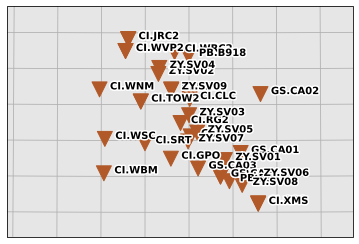

In [5]:
# plot stations
inv.plot(projection="local");

Use [write](https://docs.obspy.org/master/packages/autogen/obspy.core.inventory.inventory.Inventory.write.html) method to output station metadata in different formats.

Note that the [dip](https://docs.obspy.org/master/_modules/obspy/core/inventory/channel.html#Channel) in ObsPy is a little different from [that](https://seisman.github.io/SAC_Docs_zh/fileformat/header-variables/?highlight=cmpaz#cmpaz-cmpinc-kcmpnm-kstcmp) in SAC.

In ObsPy, dip of an instrument is degrees, **down** from **horizontal**.

| orientation | `azimuth` | `dip` |
|:-----------:|:---------:|:-----:|
| N	          |  0        |  0    |
| E	          | 90        |  0    |
| Z	          |  0        | -90   |

In SAC, dip (SAC header `cmpinc`) of an instrument is degress, **down** from **vertical up (Z)**.

| orientation | `cmpaz` | `cmpinc` |
|:-----------:|:-------:|:--------:|
| N	          |  0      | 90       |
| E	          | 90      | 90       |
| Z	          |  0      |  0       |

In [6]:
# write to a StationXML file
inv.write("stations.xml", format="STATIONXML")

In [7]:
# write to a text file
inv.write("stations.txt", format="STATIONTXT")

You can also send a [bulk request for stations](https://docs.obspy.org/master/packages/autogen/obspy.clients.fdsn.client.Client.get_stations_bulk.html) to the server.